# The Evolution of Economic Power: A Millennium of England GDP

## 1. Load, Explore and clean the dataset.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset
file_path = 'archive/millenniumofdata_v3_headlines.csv'
data = pd.read_csv(file_path)

# Select the relevant columns
features_of_interest = [
    'Description',
    'Real GDP of England at market prices',
    'Consumer price index',
    'Consumer price inflation',
    'Unemployment rate'
]

# Drop the second row (which contains units/descriptions)
data_cleaned = data.drop(index=0).reset_index(drop=True)

# Extract the relevant columns
subset_data = data_cleaned[features_of_interest]

# Check the data starting from row 63 to see if the GDP data is present
subset_data.loc[63:83, ['Description', 'Real GDP of England at market prices']]

# Trim the dataset to start from row 63 where GDP data begins
subset_data = subset_data.loc[63:].reset_index(drop=True)

# Rename the 'Description' column to 'Year'
subset_data = trimmed_data.rename(columns={'Description': 'Year'})

# Display the first few rows of the trimmed dataset to confirm
trimmed_data.head(10)

Year  ... Unemployment rate
0  1272  ...               NaN
1  1273  ...               NaN
2  1274  ...               NaN
3  1275  ...               NaN
4  1276  ...               NaN
5  1277  ...               NaN
6  1278  ...               NaN
7  1279  ...               NaN
8  1280  ...               NaN
9  1281  ...               NaN

[10 rows x 5 columns]

In [78]:
# Check for NaN values in each feature
subset_data.isna().sum()

Year                                     32
Real GDP of England at market prices     32
Consumer price index                     32
Consumer price inflation                 32
Unemployment rate                       615
dtype: int64

In [79]:
# Drop rows where 'Year' is NaN
subset_data = subset_data.dropna(subset=['Year'])

In [80]:
subset_data.dtypes

Year                                    object
Real GDP of England at market prices    object
Consumer price index                    object
Consumer price inflation                object
Unemployment rate                       object
dtype: object

In [81]:
# Convert 'Year' column to int
subset_data['Year'] = subset_data['Year'].astype(int)

# Convert all other columns to float
columns_to_convert = subset_data.columns.difference(['Year'])
subset_data[columns_to_convert] = subset_data[columns_to_convert].astype(float)

In [82]:
subset_data.dtypes

Year                                      int64
Real GDP of England at market prices    float64
Consumer price index                    float64
Consumer price inflation                float64
Unemployment rate                       float64
dtype: object

In [83]:
subset_data.shape

(745, 5)

## 2. Identify Key Historical Periods
We'll focus on aligning the GDP data with major historical events or periods, including the following:

1. The Norman Conquest (1066)
2. The Black Death (1347-1351)
3. The Industrial Revolution (1760-1840)
4. The 1929 Economic Crisis (Great Depression)
5. World War I (1914-1918)
6. World War II (1939-1945)
7. The post-war recovery period
8. The 2001 Dot-com Bubble
9. The 2008 Financial Crisis
10. The Internet Era (late 20th century onwards)

Next, we'll create visualizations that illustrate the trends in GDP across these key periods.



## Let's create a function to plot the different events that happened globably that affected UK in different time spans.

In [96]:
# Function to plot the data within a specified range
def plot_segment(df, start_year, end_year, events, title):
    df_segment = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot GDP on primary y-axis
    ax1.plot(df_segment['Year'], df_segment['Real GDP of England at market prices'], color='blue', label='GDP', linewidth=2)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Real GDP of England at market prices (in millions)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot CPI on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df_segment['Year'], df_segment['Consumer price index'], color='red', label='CPI', linewidth=2)
    ax2.set_ylabel('Consumer price index', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Plot Unemployment on third y-axis
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
    ax3.plot(df_segment['Year'], df_segment['Unemployment rate'], color='green', label='Unemployment', linewidth=2)
    ax3.set_ylabel('Unemployment rate (%)', color='green')
    ax3.tick_params(axis='y', labelcolor='green')

    # Mark significant historical events
    for year, event in events.items():
        if start_year <= year <= end_year:
            plt.axvline(x=year, color='black', linestyle='--', linewidth=1)
            ax1.text(year, ax1.get_ylim()[1] * 1.05, event, rotation=90, verticalalignment='bottom', horizontalalignment='center')

    # Add a title
    plt.title(title, fontsize=16)

    # Show the plot
    plt.tight_layout()
    plt.show()

events = {
    1348: 'Black Death',
    1688: 'Glorious Revolution',
    1750: 'Start of Industrial Revolution',
    1880: 'Electricity Revolution',
    1914: 'World War I',
    1918: 'Spanish Flu Pandemic',
    1929: 'Great Depression',
    1939: 'World War II',
    1973: 'Oil Crisis',
    1980: 'Internet Revolution',
    2000: '.com Bubble Burst',
    2008: 'Global Financial Crisis',
}

## Economic Evolution: 1272-1522

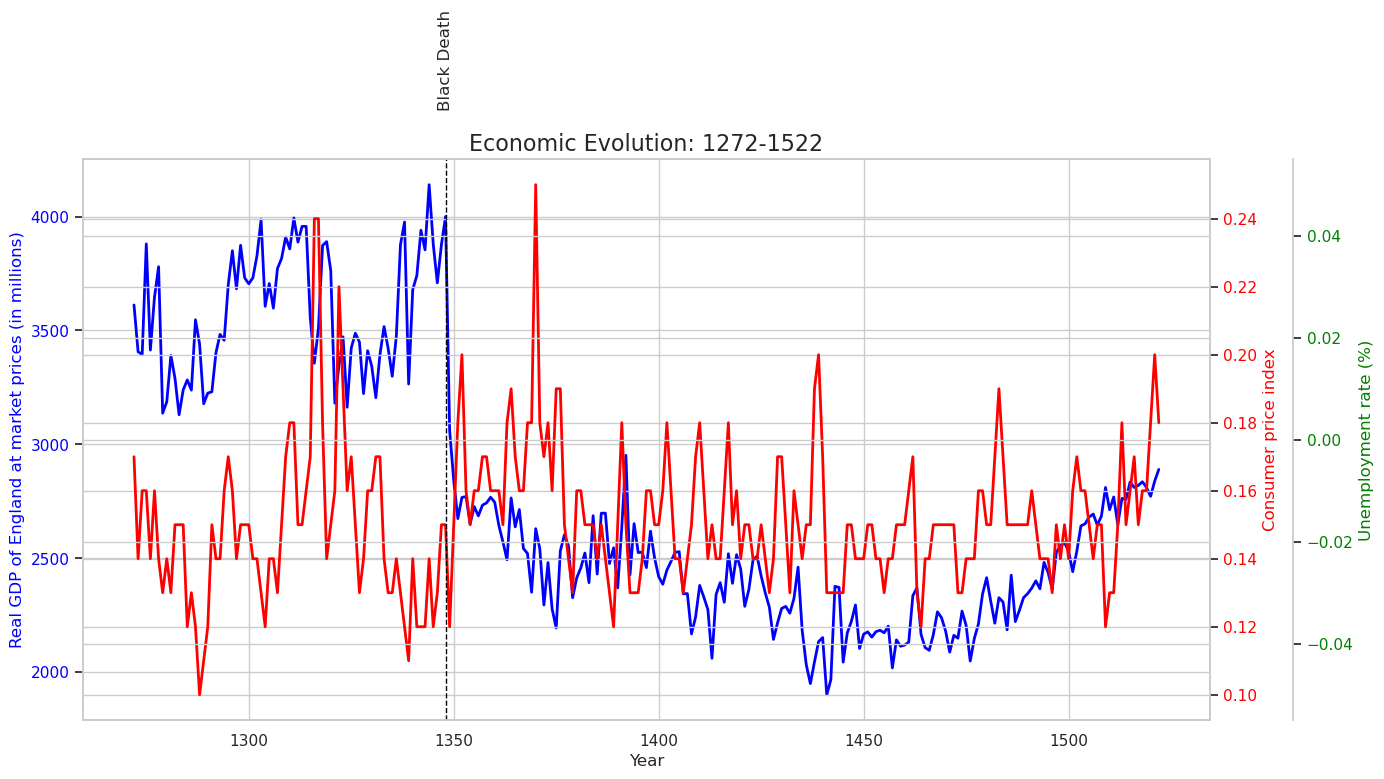

In [102]:
plot_segment(subset_data, 1272, 1522, events, 'Economic Evolution: 1272-1522')

#### Before the Black Death (1272-1347)
In the years leading up to the Black Death, England’s economy was on a steady rise. The chart shows a gradual increase in GDP, reflecting a period of stability. However, the red line representing the CPI reveals frequent inflation spikes, highlighting the economy’s vulnerability to agricultural fluctuations.

#### Impact of the Black Death (1348-1350)

The Black Death’s arrival in 1348 brought a dramatic downturn, clearly seen in the sharp drop in GDP. The population was nearly halved, causing the economy to contract severely. The CPI's wild fluctuations during this period, evident in the red line’s volatility, show the market chaos as prices responded to labor shortages and collapsing demand.

#### Recovery and Instability (1351-1522)
Post-Black Death, the economy began to recover, as indicated by the upward trend in GDP. However, the chart reveals continued instability, with frequent CPI spikes suggesting ongoing economic shocks, possibly due to recurring plagues and social unrest. By the late 15th century, the economy starts to stabilize, setting the stage for future growth.

This chart powerfully reflects the story of an economy shaped by dramatic events, showing how GDP, inflation, and unemployment were deeply intertwined with the social and demographic shifts of the time.

## Economic Evolution: 1523-1772

Economic Evolution of England (1523-1772)
The period from 1523 to 1772 marks a critical phase in England's economic history, where the seeds of modern industrialization were sown. The chart captures this transformative era, showing how GDP, inflation, and unemployment interacted against a backdrop of significant historical events.



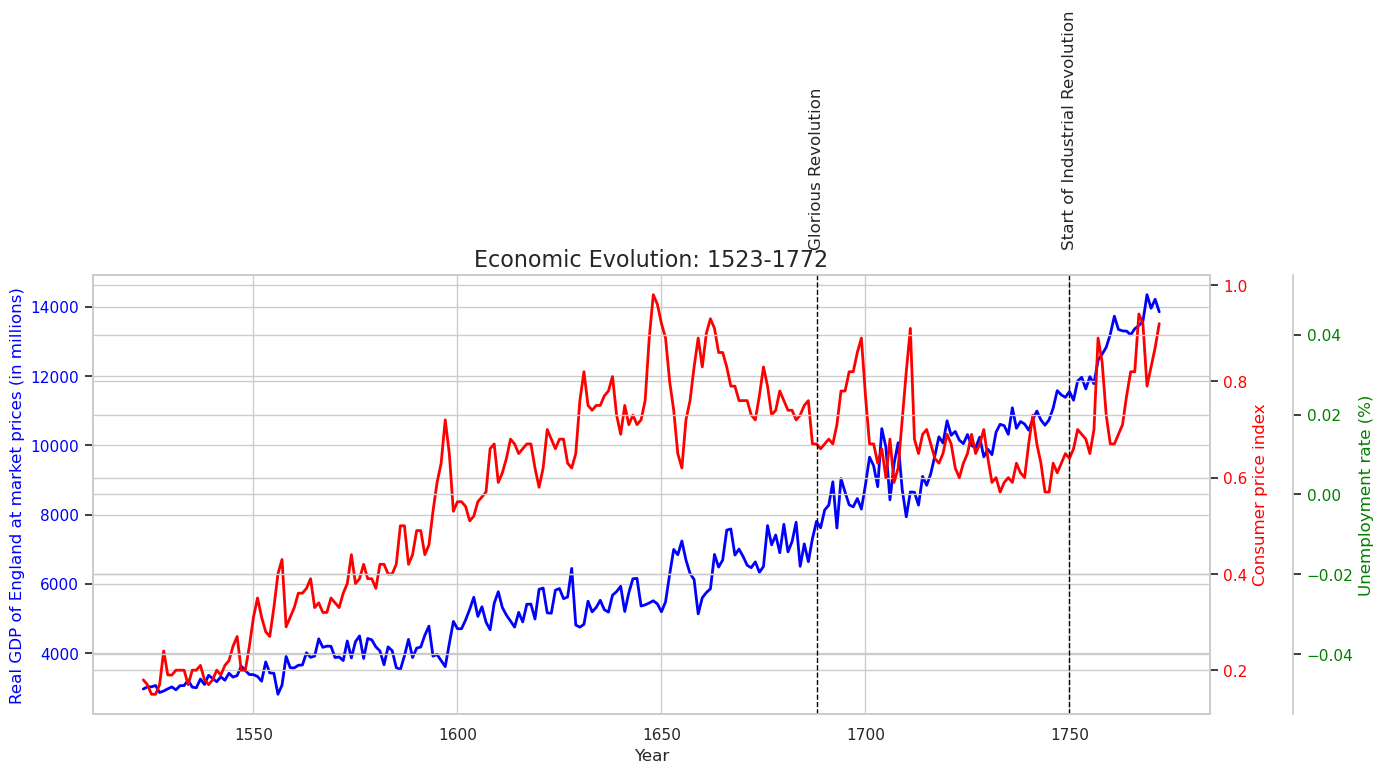

In [101]:
plot_segment(subset_data, 1523, 1772, events, 'Economic Evolution: 1523-1772')

#### Early Growth and Inflation (1523-1687)
The early part of this period saw steady economic growth, reflected in the blue line's upward trend for GDP. However, the red line representing CPI indicates that inflation was a persistent challenge, with frequent spikes hinting at economic instability, possibly due to the tumultuous political climate and periodic famines.

#### The Glorious Revolution (1688)
The Glorious Revolution of 1688 is a pivotal event marked on the chart, signaling a shift towards a more stable political and economic environment. Post-1688, the chart shows a more consistent upward trend in GDP, suggesting that the economic reforms and political stability brought about by the revolution had a positive impact on growth.

#### Pre-Industrial Revolution Boom (1689-1772)
As England moved closer to the Industrial Revolution, the chart reveals a significant acceleration in GDP growth, with the blue line rising sharply. This period, particularly after 1700, reflects the early stages of industrialization, where advancements in technology and increased trade began to reshape the economy.

Inflation remained volatile, as seen in the red line's fluctuations, but the overall trend indicates a closer alignment between GDP growth and CPI, suggesting a more balanced economic expansion. The unemployment rate, though difficult to measure accurately, likely benefited from the increased demand for labor in burgeoning industries.

## Economic Evolution: 1773-2016

#### Chart Overview 1773 to 2016
The period from 1773 to 2016 encapsulates the most transformative era in England's economic history. The chart clearly illustrates the dramatic rise in GDP, represented by the blue line, which accelerates exponentially with the onset of the Industrial Revolution and continues its upward trajectory through the modern era. The red line, indicating the Consumer Price Index (CPI), shows a steady increase in inflation, particularly after World War II, reflecting the growing complexities of a modern economy.

The green line, representing unemployment, reveals significant fluctuations, especially during periods of economic downturns and wars, but shows a general trend of stabilization towards the latter half of the 20th century. The historical events marked on the chart correspond with key moments that disrupted or accelerated economic trends, offering a clear narrative of how England evolved from an agrarian society into a global economic powerhouse.

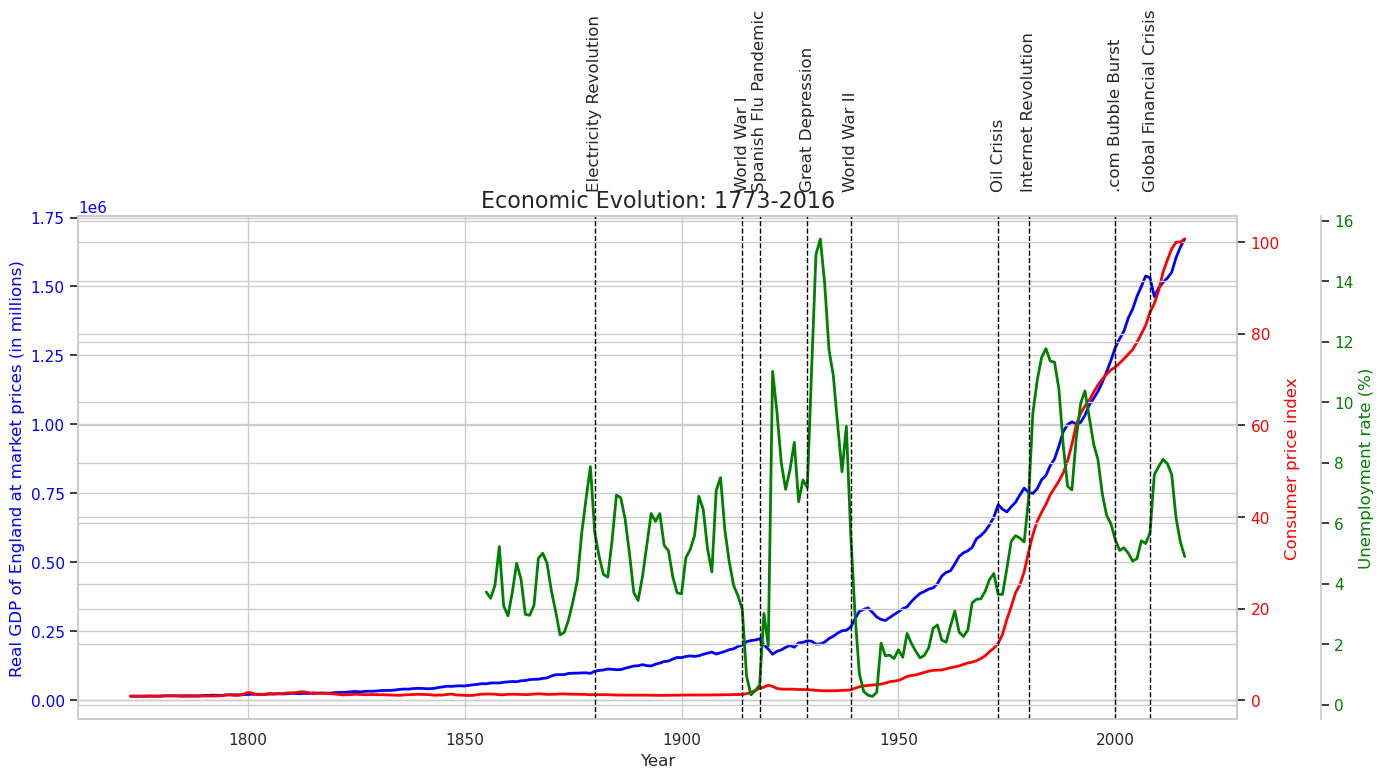

In [100]:
plot_segment(subset_data, 1773, df['Year'].max(), events, 'Economic Evolution: 1773-2016')

#### The Electricity Revolution around 1880 

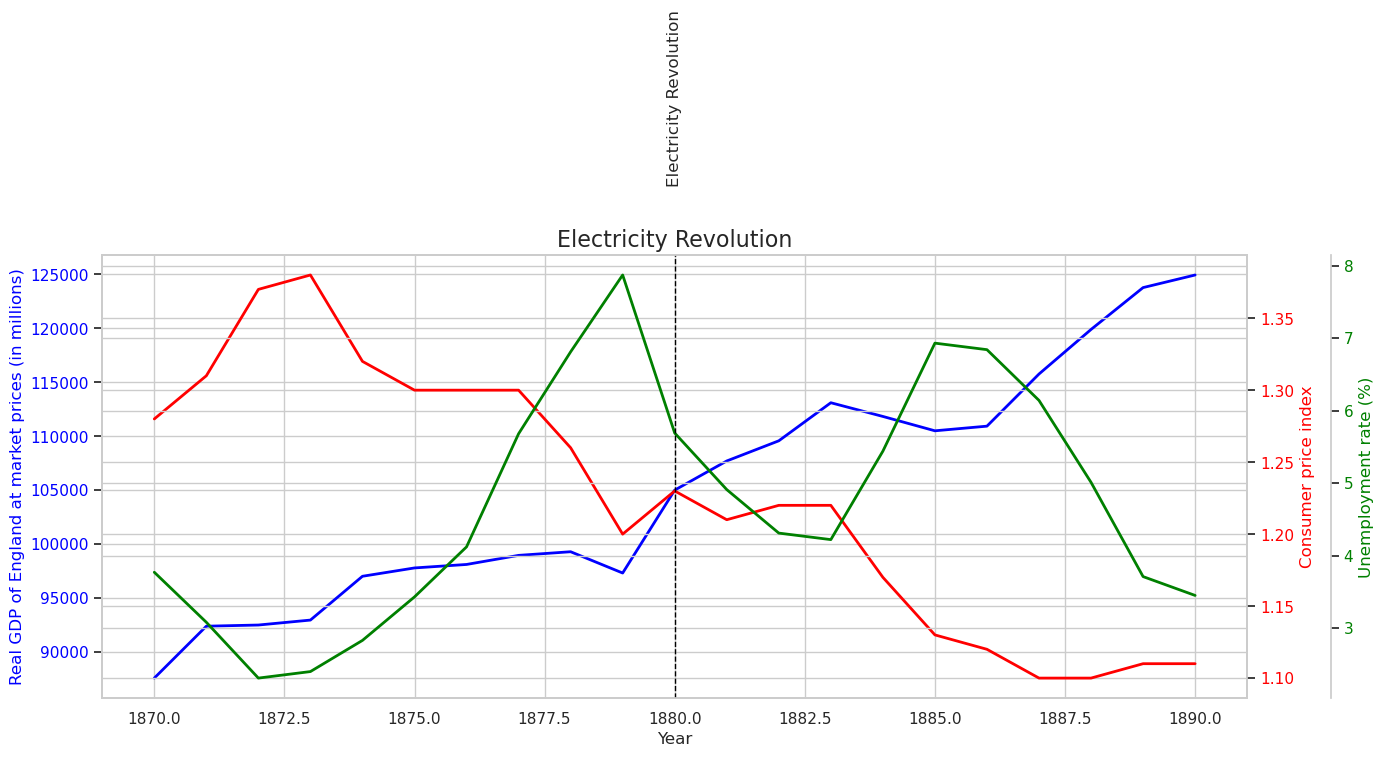

In [99]:
plot_segment(subset_data, 1870, 1890, events, 'Electricity Revolution')

Marked a transformative period in England's economic history, as seen in the chart. The blue line representing GDP shows a clear upward trend after 1880, indicating how the adoption of electricity began to boost economic productivity and industrial growth.

However, the green line for unemployment initially spikes just before this period, likely reflecting the labor market's adjustment to new technologies. As the economy began to integrate electricity into industries, unemployment started to decrease, signaling a shift towards more stable employment as new jobs were created in emerging sectors.

Interestingly, the red CPI line, which reflects inflation, shows a slight decline post-1880. This suggests that the efficiency gains from electricity might have helped stabilize prices, even as the economy expanded.

Overall, this graph illustrates how the Electricity Revolution was a catalyst for economic growth, reducing unemployment and stabilizing inflation, thereby laying the groundwork for the modern industrial economy.

#### World War I and Spanish Flu (1914-1918)

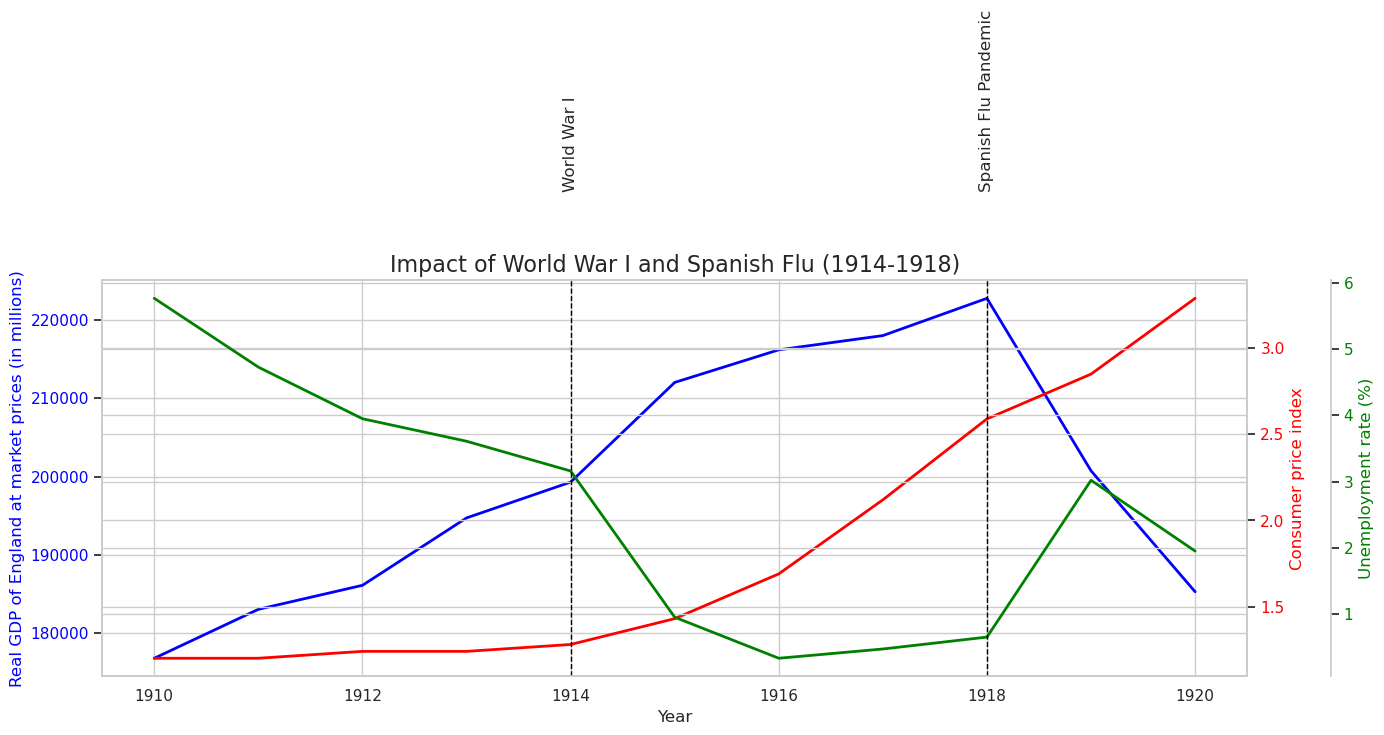

In [104]:
# World War I and Spanish Flu (1914-1918)
plot_segment(subset_data, 1910, 1920, events, 'Impact of World War I and Spanish Flu (1914-1918)')

The Impact of World War I and the Spanish Flu Pandemic (1914-1918)is dramatically reflected in this chart.

As World War I begins, we see a significant rise in GDP, represented by the blue line, likely driven by wartime production and government spending. However, this economic activity is coupled with a sharp increase in the CPI, shown by the red line, indicating rising inflation as the war disrupted supply chains and increased demand for goods.

Unemployment, depicted by the green line, initially declines as more people are employed in war-related industries. However, the war's end and the onset of the Spanish Flu pandemic in 1918 bring about a stark reversal. GDP growth slows, inflation continues to rise, and unemployment spikes as the economy reels from the dual impact of post-war adjustments and the deadly pandemic.

This period underscores the fragile balance of wartime economies and the profound disruptions caused by global conflicts and pandemics. The chart highlights how, despite temporary boosts in GDP, the underlying economic instability led to significant long-term challenges.

#### Great Depression (1929)

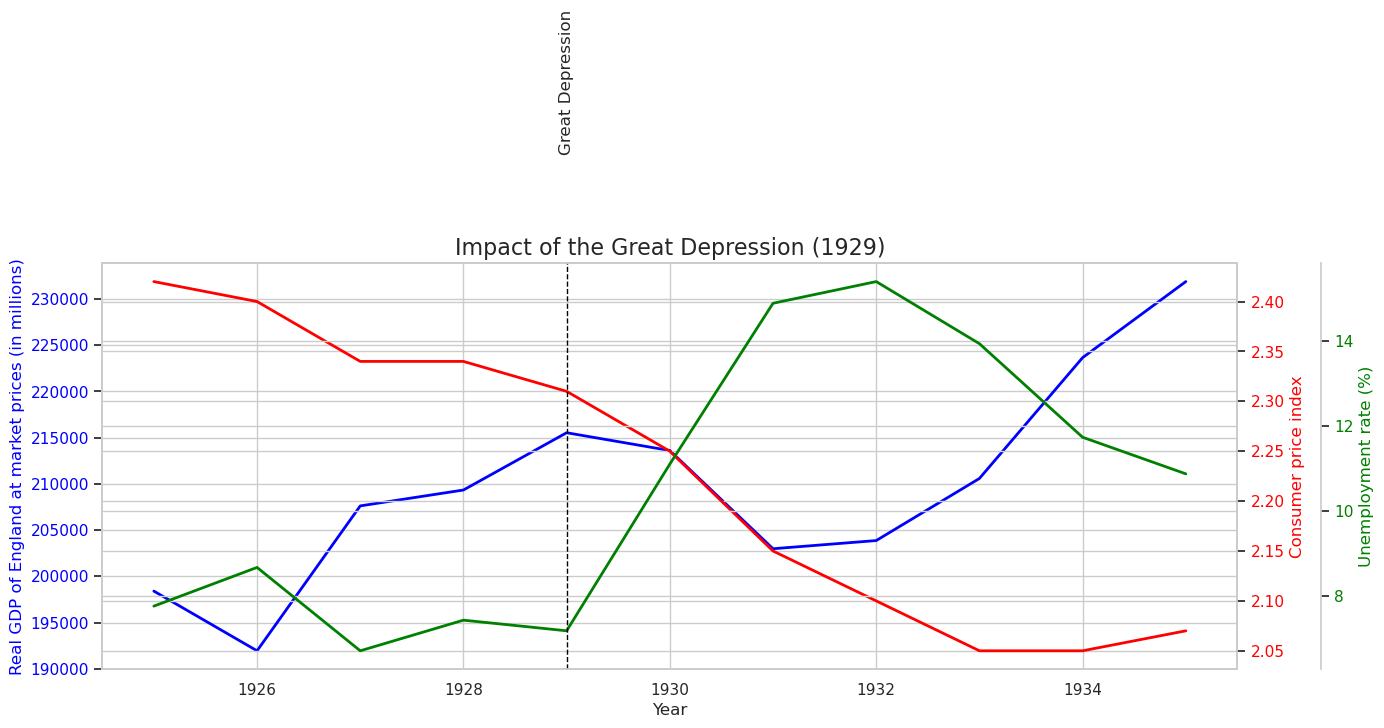

In [106]:
# Great Depression (1929)
plot_segment(subset_data, 1925, 1935, events, 'Impact of the Great Depression (1929)')

The Great Depression (1929) left an indelible mark on the global economy, and this chart vividly captures its impact on England.

As the Great Depression began, the chart shows a sharp rise in unemployment, represented by the green line, reflecting the widespread job losses that characterized this period. Simultaneously, GDP, indicated by the blue line, flattens and then begins a slow recovery, illustrating how the economic output stalled during these years.

Interestingly, the red line for the Consumer Price Index (CPI) trends downward, highlighting the deflationary pressures that gripped the economy. Deflation further exacerbated the economic crisis by reducing consumer spending and investment, creating a vicious cycle of economic decline.

This chart clearly demonstrates the severity of the Great Depression's impact on England's economy, with rising unemployment, stagnant GDP, and falling prices contributing to one of the most challenging periods in modern economic history. The slow recovery depicted here underscores the lasting effects of such a profound economic shock.

#### World War II (1939-1945)

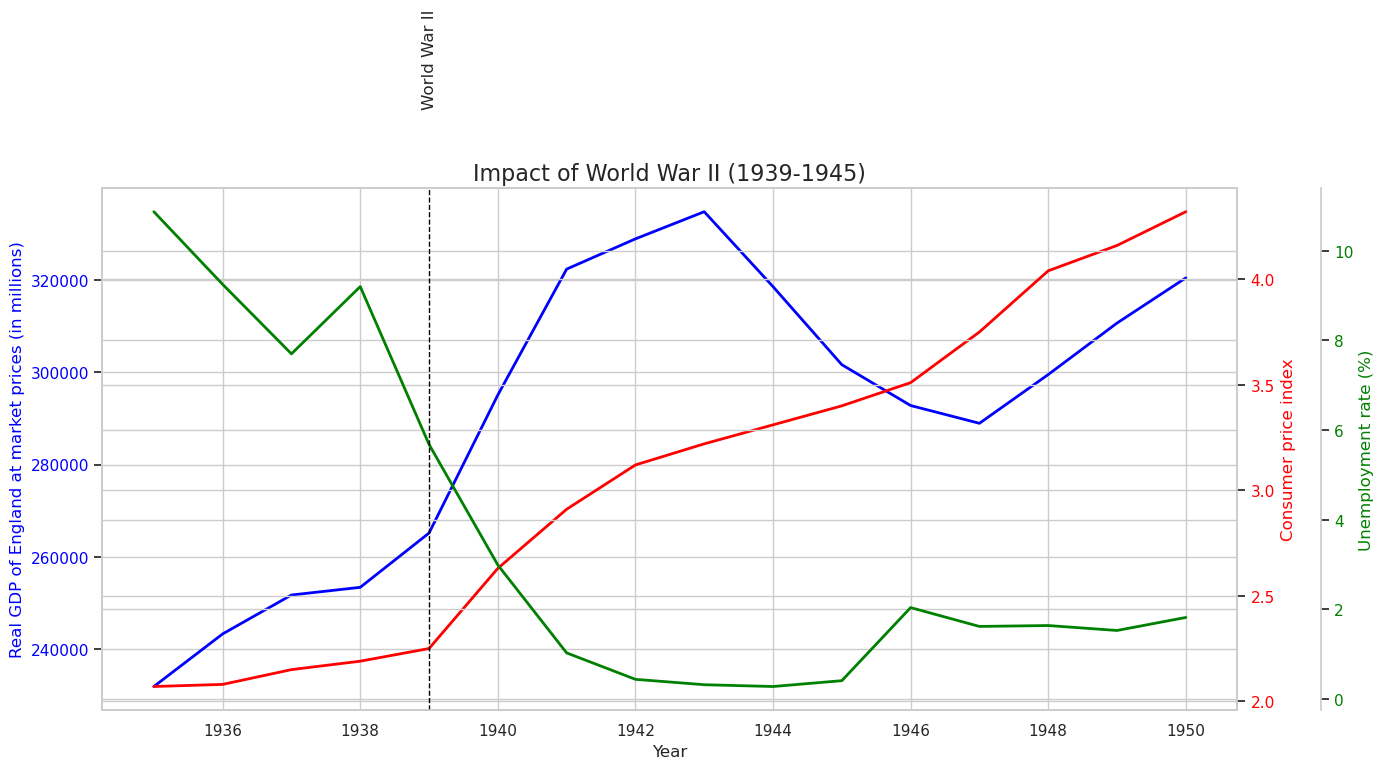

In [110]:
# World War II (1939-1945)
plot_segment(subset_data, 1935, 1950, events, 'Impact of World War II (1939-1945)')

The Impact of World War II (1939-1945) on England's economy is starkly illustrated in this chart.

As World War II began, the GDP, shown by the blue line, initially surged due to the massive increase in war-related production and government spending. This rise, however, was accompanied by a significant increase in the Consumer Price Index (CPI), represented by the red line, reflecting the inflationary pressures caused by the war. The economy was strained by the demand for resources and labor, pushing prices higher.

Interestingly, unemployment, depicted by the green line, plummeted during the war years, as the demand for labor in war industries and the military absorbed much of the available workforce. This drop in unemployment highlights the full mobilization of the economy in response to the war effort.

Post-war, the chart shows a sharp drop in GDP as wartime production ceased, but inflation continued to rise, reflecting the challenges of transitioning back to a peacetime economy. Unemployment remained low, but the economy faced the task of restructuring and managing inflation as it recovered from the war's devastation.

This period underscores the profound impact of global conflict on national economies, with rapid changes in GDP, inflation, and unemployment reflecting the extraordinary demands and subsequent adjustments required by war.

#### Impact of the Oil Crisis (1973)

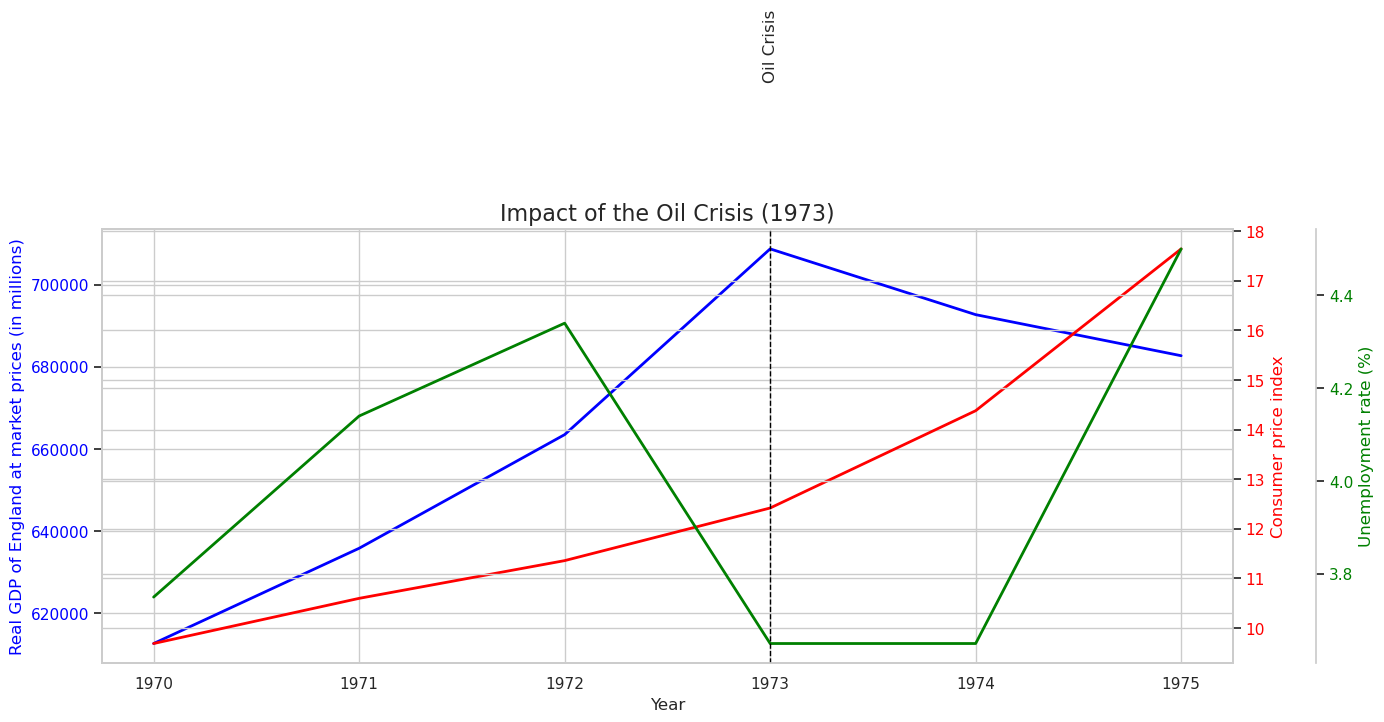

In [111]:
# World War II (1939-1945)
plot_segment(subset_data, 1970, 1975, events, 'Impact of the Oil Crisis (1973)')


The Oil Crisis of 1973 was a significant event that had a profound impact on the global economy, and this chart captures its effects on England.

As the crisis unfolded, the chart shows a noticeable peak in GDP around 1973, represented by the blue line, reflecting the economic activity just before the crisis hit. However, this is followed by a sharp decline, indicating the immediate economic slowdown caused by skyrocketing oil prices.

The red line, representing the Consumer Price Index (CPI), rises steeply during and after the crisis, showing the inflationary pressures that gripped the economy as the cost of energy and transportation surged. This inflation was one of the defining features of the 1970s economic landscape.

Unemployment, depicted by the green line, also saw a significant increase, as industries that were heavily reliant on oil faced rising costs and reduced output, leading to job losses. The spike in unemployment post-1973 highlights the broader economic distress caused by the energy crisis.

This chart illustrates how the Oil Crisis triggered a period of economic instability, marked by falling GDP, rising inflation, and increasing unemployment, reflecting the vulnerability of economies to global shocks and the critical importance of energy resources.








#### Impact of the Internet Revolution (1980)

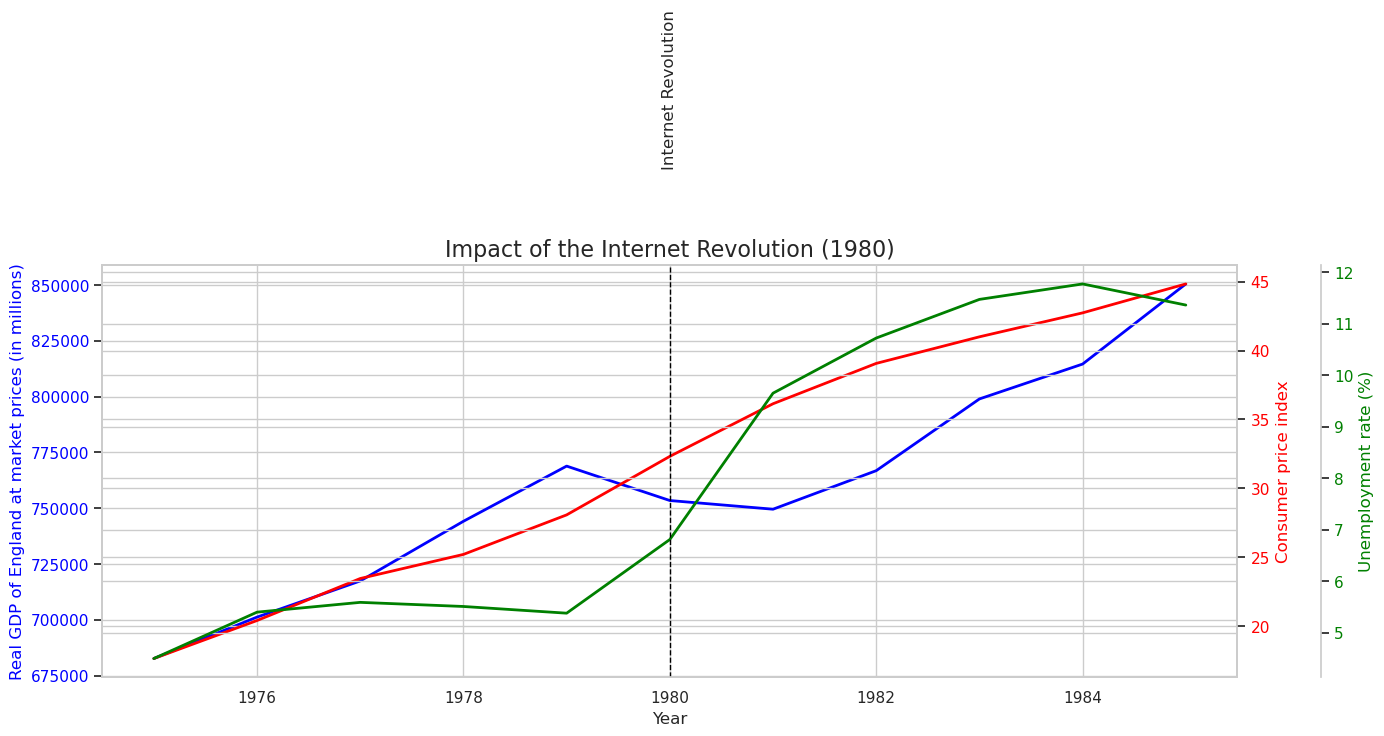

In [112]:
# Internet Revolution (1980)
plot_segment(subset_data, 1975, 1985, events, 'Impact of the Internet Revolution (1980)')

The Internet Revolution of 1980 marked the beginning of a profound transformation in the global economy, and this chart captures its early impact on England.

As the internet began to take shape, the chart shows a steady rise in GDP, represented by the blue line, reflecting the economic expansion fueled by new technologies and innovations. This period saw the emergence of new industries and business models that began to redefine economic growth.

The red line, representing the Consumer Price Index (CPI), also increased during this time, indicating that while the economy was growing, inflation remained a challenge, likely driven by the rapid changes in the market and the costs associated with new technology adoption.

Interestingly, the green line for unemployment shows a decline following the onset of the Internet Revolution, highlighting how the new technological landscape began to create jobs and reduce unemployment. The convergence of these trends—rising GDP, manageable inflation, and decreasing unemployment—illustrates the positive economic impact of the Internet Revolution, setting the stage for the digital age that would follow.

This chart underscores the transformative power of technology in shaping economic growth and stability, with the Internet Revolution acting as a catalyst for broad-based economic expansion.

#### .com Bubble Burst (2000)

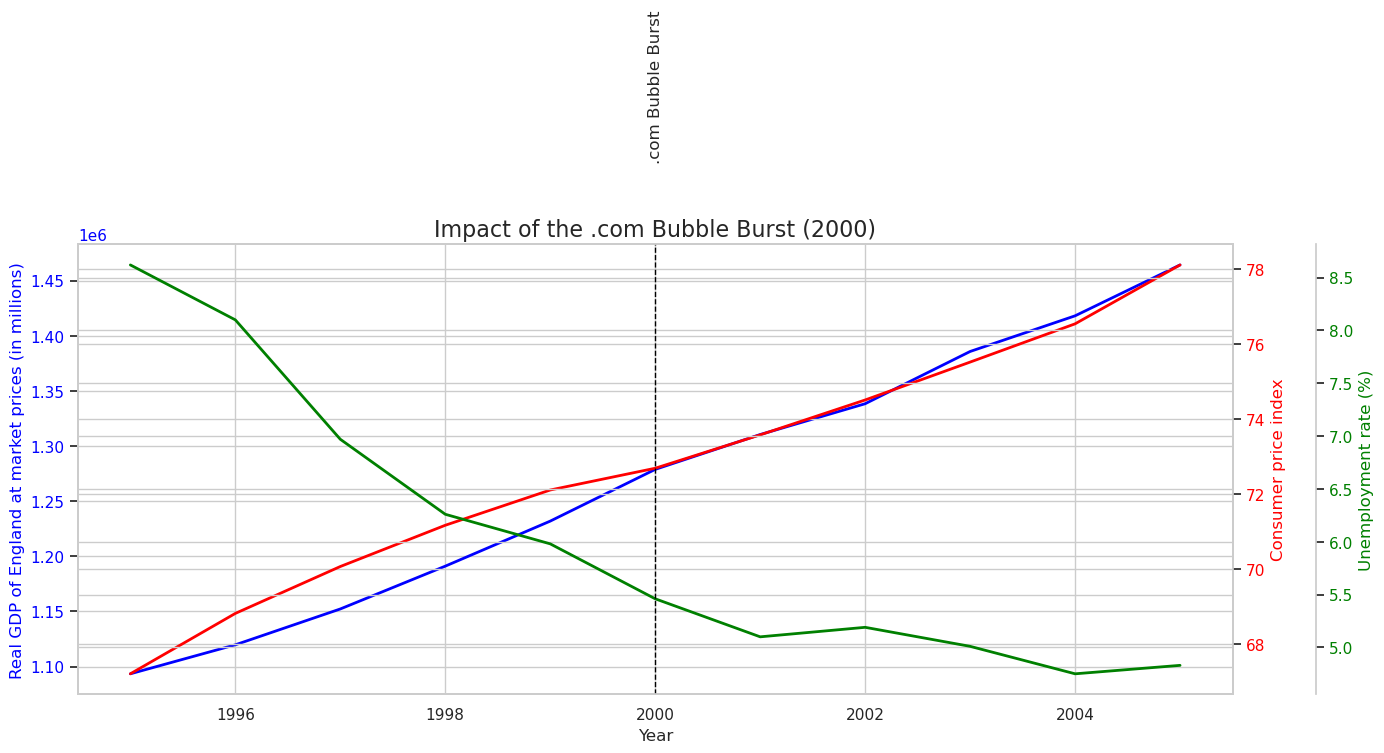

In [113]:
# .com Bubble Burst (2000)
plot_segment(subset_data, 1995, 2005, events,'Impact of the .com Bubble Burst (2000)')

While the .com Bubble Burst of 2000 certainly had global repercussions, the chart shows that England's economy managed to weather the storm relatively well. The GDP, indicated by the blue line, continues to rise steadily even after the bubble burst, suggesting that the overall economic growth in England remained resilient. This contrasts with the more dramatic downturns seen in other parts of the world, particularly in the United States.

Unemployment, shown by the green line, does rise slightly post-2000, but the increase is modest. This suggests that while there were some job losses, particularly in tech-related sectors, the broader economy was able to absorb these shocks without a significant spike in unemployment.

Meanwhile, the red line representing the Consumer Price Index (CPI) shows a consistent upward trend, indicating stable inflation. This stability suggests that the economic policies in place were effective in preventing the bubble's burst from causing widespread inflationary or deflationary pressures.

Overall, the chart reflects that while England was not entirely immune to the effects of the .com bubble burst, the impact was relatively muted. The country’s diversified economy and perhaps more cautious investment in the tech sector may have helped mitigate the worst effects, allowing for continued economic growth and stability during a period of global financial uncertainty.

#### Impact of the Global Financial Crisis (2008)

/tmp/ipykernel_6192/1192799974.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


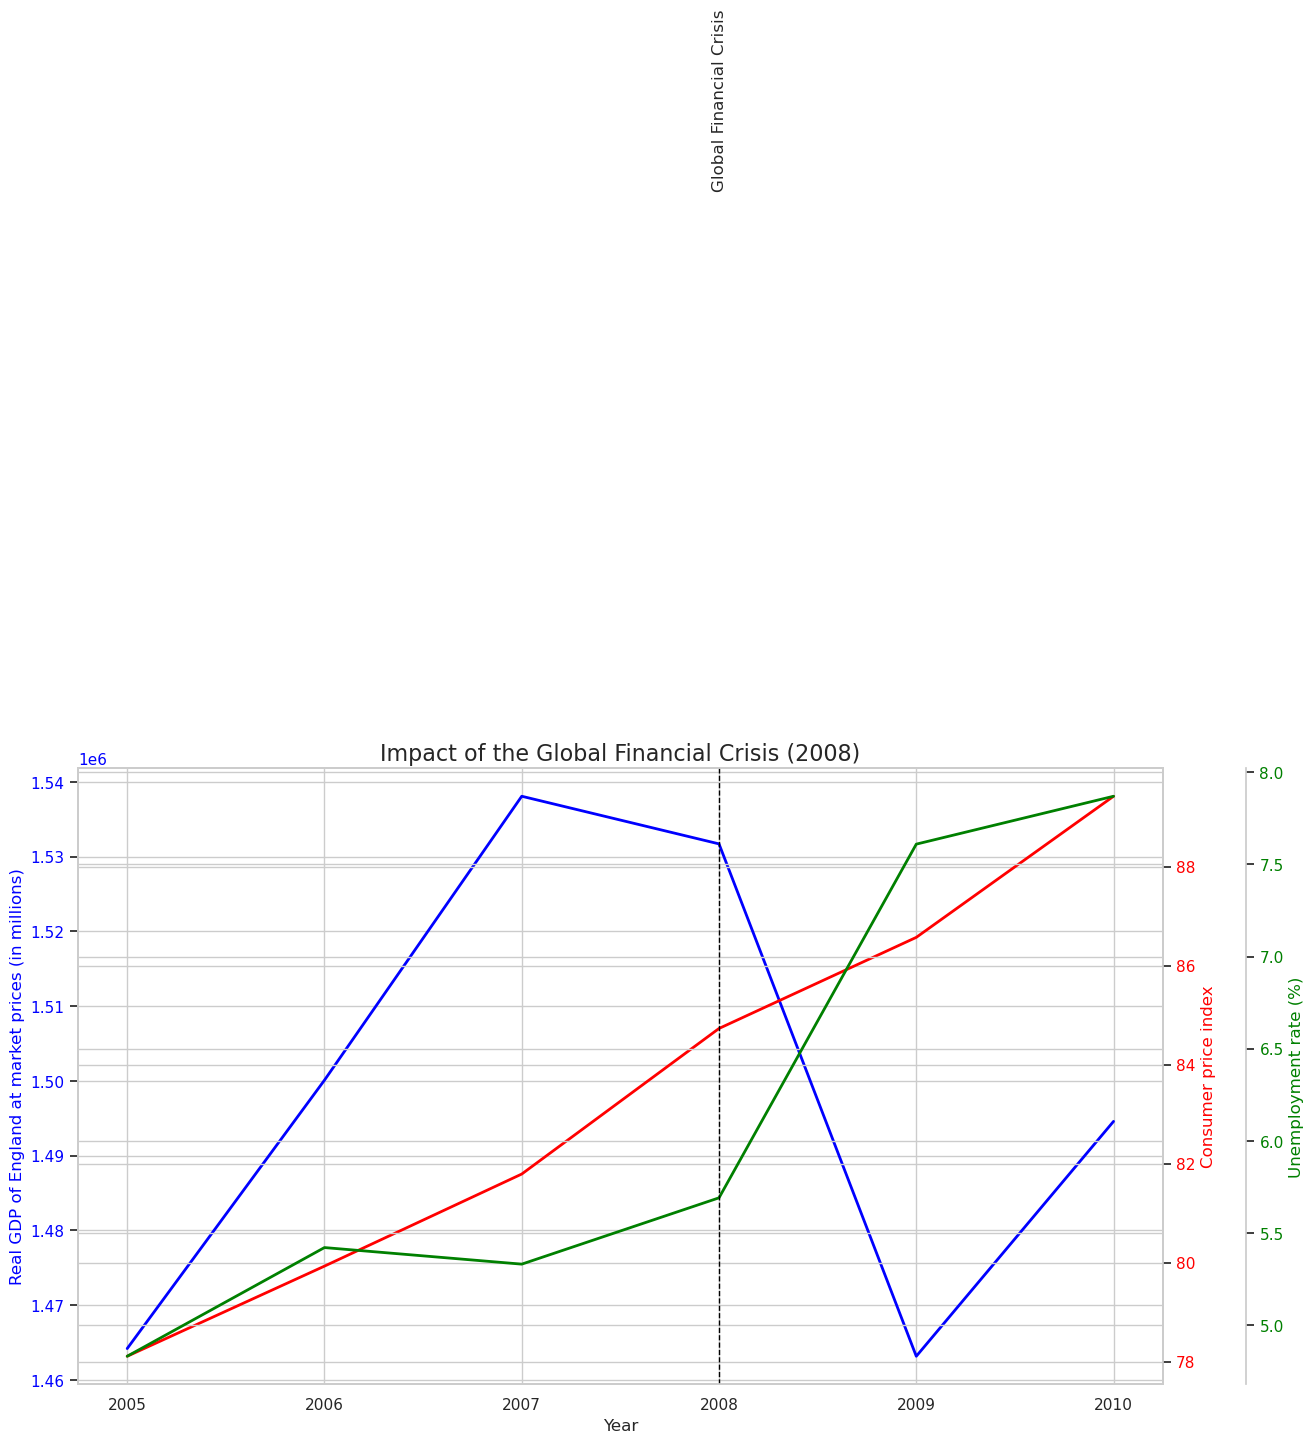

In [115]:
# Global Financial Crisis (2008)
plot_segment(subset_data, 2005, 2010, events, 'Impact of the Global Financial Crisis (2008)')

The Global Financial Crisis of 2008 was one of the most significant economic events of the 21st century, and this chart reflects its impact on England.

Leading up to the crisis, the chart shows a strong rise in GDP, represented by the blue line, indicating robust economic growth. However, as the crisis hit in 2008, GDP took a sharp downturn, reflecting the severe contraction in economic activity as financial markets collapsed and credit dried up.

The green line, representing unemployment, shows a steep increase following the crisis, indicating significant job losses as businesses downsized or shut down in response to the economic downturn. This rise in unemployment is one of the clearest indicators of the crisis's immediate impact on people's livelihoods.

Meanwhile, the red line for the Consumer Price Index (CPI) continues to rise steadily, even during the crisis, suggesting that inflation remained a concern despite the economic slowdown. This could be due to various factors, including rising costs of goods and services or delayed effects of previous inflationary pressures.

Overall, the chart vividly captures the abrupt economic shock caused by the Global Financial Crisis, with a sharp drop in GDP, a rapid rise in unemployment, and continued inflationary pressure, highlighting the widespread and far-reaching effects of the crisis on England's economy.

# Conclusion: The Economic Tapestry of England Through the Centuries

From the early days of the **Black Death** to the dawn of the **Internet Revolution**, our journey through England's economic history has highlighted the profound impact of key events on GDP, employment, and inflation. Each era brought its own challenges and opportunities, reshaping the economy in ways that still resonate today.

## The Plague and Recovery (1272-1522)
The **Black Death** in the 14th century was a devastating blow, reducing the population and disrupting the economy. Yet, from this dark period emerged a resilient economy that gradually recovered, setting the stage for the future growth that would define the Renaissance.

## Revolution and Industrialization (1523-1772)
The **Glorious Revolution** and the onset of the **Industrial Revolution** marked a period of profound transformation. England's economy shifted from agrarian roots to industrial might, with GDP growth accelerating and new job opportunities emerging, even as inflation and social upheaval tested the fabric of society.

## The Modern Era's Challenges and Triumphs (1773-2016)
The **Electricity Revolution** and **World Wars** demonstrated the power of technological and political forces to drive economic change. The post-war boom and the **Oil Crisis** of 1973 illustrated both the potential for rapid growth and the risks of global economic shocks. As we moved into the digital age, the **Internet Revolution** and the **.com Bubble Burst** showed the double-edged sword of technological innovation, while the **Global Financial Crisis of 2008** reminded us of the fragility of even the most advanced economies.

Throughout these centuries, England's economy has demonstrated a remarkable ability to adapt and evolve, surviving crises and capitalizing on opportunities. The threads of GDP, employment, and inflation weave together a complex tapestry that tells the story of a nation continually reinventing itself in the face of both internal and external challenges.

# The Future of Global Economy: The Generative AI Revolution

As we stand on the brink of another transformative era, the rise of **Generative AI** promises to reshape the global economy in ways that are both exhilarating and uncertain. Imagine a world where AI not only augments human capabilities but also begins to perform tasks that were once the exclusive domain of skilled professionals. The potential impact on **GDP, employment, and inflation** is nothing short of revolutionary, but with every revolution comes the risk of upheaval.

## GDP: A New Era of Productivity?

Generative AI holds the promise of unprecedented productivity gains. Imagine an economy where creative tasks, from content generation to complex problem-solving, are done faster and more efficiently by AI systems. This could lead to a surge in GDP as industries from entertainment to finance are transformed by AI-driven innovation. But with great power comes great responsibility. Will the benefits of this new technology be distributed evenly, or will it exacerbate the growing divide between those who control the technology and those who do not?

## Employment: A Double-Edged Sword

While GDP may soar, the impact on employment could be far more complex. On one hand, Generative AI could create entirely new industries and job roles that we can't even imagine today. On the other hand, it could render millions of jobs obsolete almost overnight. The jobs most at risk are not just routine tasks, but also high-skilled professions like journalism, law, and even software development. The potential for mass displacement is real, and without careful planning and adaptation, we could see a rise in unemployment that rivals the worst crises of the past.

## Inflation: Stability or Disruption?

The impact of Generative AI on inflation is a wild card. On one hand, AI-driven efficiency could lead to lower production costs, potentially stabilizing prices or even creating deflationary pressures. On the other hand, rapid changes in the job market and shifts in economic power could lead to instability and inflationary spikes, especially if the transition to an AI-driven economy is not managed carefully. The stakes are high, and the outcomes are anything but certain.

## The Prequel to a New Crisis?

As we look to the future, it's tempting to draw parallels with the past. The Industrial Revolution brought about unprecedented economic growth, but it also led to significant social upheaval and economic crises. Could the rise of Generative AI be the prequel to a new kind of crisis? One where the benefits of AI are concentrated in the hands of a few, while the many are left behind in a world where traditional jobs have vanished? The potential for a new economic divide is real, and the consequences could be profound.

As the credits roll on our current economic era, the next chapter is yet to be written. **Will Generative AI usher in a new golden age of prosperity, or will it set the stage for the next great economic crisis?** The answers will unfold in the coming years, and one thing is certain: the world will never be the same again.

**Stay tuned. The future is closer than you think.**